# Entrenar un autoencoder basado en capas Dense en Mnist

In [0]:
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

np.random.seed(1337)

# MNIST dataset
def load_data():
  (x_train, _), (x_test, _) = mnist.load_data()
  input_dim = 28*28
  x_train = np.reshape(x_train, [-1, input_dim])/255.0
  x_test = np.reshape(x_test,   [-1, input_dim])/255.0
  
  return x_train,x_test,input_dim


def DenseAutoencoder(input_dim,latent_dim):
  def generate_encoder():
    encoder_input = Input(shape=(input_dim,), name='encoder_input')
    code = Dense(latent_dim, name='latent_vector')(encoder_input)
    encoder = Model(encoder_input, code, name='encoder')
    return encoder,encoder_input

  def generate_decoder():
    latent_input = Input(shape=(latent_dim,), name='decoder_input')
    decoded_image = Dense(input_dim,activation="sigmoid",name='decoder_output')(latent_input)
    decoder = Model(latent_input, decoded_image, name='decoder')
    return decoder

  encoder,encoder_input = generate_encoder()
  decoder = generate_decoder()
  autoencoder = Model(encoder_input, decoder(encoder(encoder_input)), name='autoencoder')
  return autoencoder,encoder,decoder


latent_dim = 64
x_train,x_test,input_dim = load_data()
print(x_train.shape,x_test.shape,input_dim)

autoencoder,encoder,decoder=DenseAutoencoder(input_dim,latent_dim)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

print(autoencoder.summary()) 
print(encoder.summary()) 
print(decoder.summary()) 

batch_size = 128
# Train the autoencoder
autoencoder.fit(x_train,
                x_train,
                validation_data=(x_test, x_test),
                epochs=10,
                batch_size=batch_size)

# Predict the Autoencoder output from test images
x_decoded = autoencoder.predict(x_test)






Using TensorFlow backend.


(60000, 784) (10000, 784) 784




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 784)               0         
_________________________________________________________________
encoder (Model)              (None, 64)                50240     
_________________________________________________________________
decoder (Model)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
None
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 784)               0         
_______________________________

# Mostrar imágenes antes y después de pasar por el modelo

---



Original images
Restored images


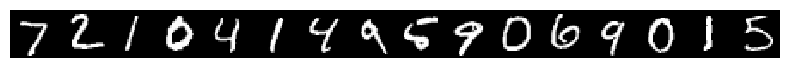

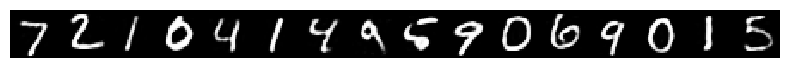

In [0]:
# Display images with decoded


def show_as_single_image(imgs,image_shape):
  h,w=image_shape
  n,c=imgs.shape
  imgs = imgs.reshape((n, h,w))
  imgs = imgs.swapaxes(1,2).reshape((n*w, h)).swapaxes(0,1)
  imgs = (imgs * 255).astype(np.uint8)

  plt.figure(figsize=(1*8,n*8),dpi=100)
  plt.axis('off')
  plt.imshow(imgs, interpolation='none', cmap='gray')
  plt.tight_layout()

num=16
print("Original images")
show_as_single_image(x_test[:num],(28,28))
print("Restored images")
show_as_single_image(x_decoded[:num],(28,28))


# Intentar generar nuevas muestras desde el espacio latente (no funciona, necesito usar [Autoencoders variacionales](https://blog.keras.io/building-autoencoders-in-keras.html) or GANs)



(8, 784)
Randomly generated images


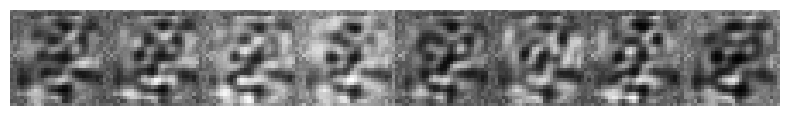

In [0]:

num_images=8
random_latent_code = np.random.random_sample([num_images,latent_dim])

random_images = decoder.predict(random_latent_code)

print(random_images.shape)
print("Randomly generated images")
show_as_single_image(random_images,(28,28))